In [31]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
num_gpu = 1 if torch.cuda.is_available() else 0
num_gpu =0

# load the models
from dcgan import Discriminator, Generator, FeatureExtractor

D = Discriminator(ngpu=0).eval()
G = Generator(ngpu=0).eval()
F = FeatureExtractor(ngpu=0).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth',map_location=torch.device('cpu')))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth',map_location=torch.device('cpu')))
F.load_state_dict(torch.load('weights/netD_epoch_99.pth',map_location=torch.device('cpu')),strict=False)

if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

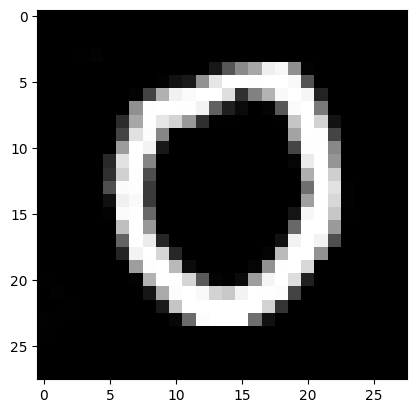

In [33]:
batch_size = 1
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 1, 1
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()

# run discriminator

In [41]:

outputs = D(fake_images)
print(outputs)

tensor([0.2461], grad_fn=<SqueezeBackward1>)


In [42]:
outputs = F(fake_images)

In [43]:
print(outputs)

tensor([[[[-0.1042,  0.4361, -0.2302],
          [ 0.3295,  0.0284, -0.3813],
          [ 0.0176, -0.3206,  0.3467]],

         [[ 1.6662,  0.6895, -0.1268],
          [-0.0026, -0.3201, -0.1419],
          [-0.2722,  1.3106,  0.1335]],

         [[ 0.4357,  1.7679, -0.1976],
          [ 0.9376, -0.2207, -0.1614],
          [ 0.2438,  1.7709, -0.0056]],

         ...,

         [[ 0.3837, -0.1382, -0.2260],
          [-0.0529, -0.1955,  1.8047],
          [-0.1445, -0.1438, -0.1695]],

         [[-0.1862,  0.8932, -0.3409],
          [ 1.2507, -0.3487,  0.8854],
          [ 2.1849,  0.1658, -0.0535]],

         [[-0.1882,  2.2738, -0.4792],
          [-0.1617, -0.0391,  0.5042],
          [ 0.1798,  0.0034, -0.1719]]]], grad_fn=<LeakyReluBackward1>)


In [8]:
output_np =outputs.cpu().detach().numpy()

In [9]:
output_np[0,0]

array([[-0.08939418,  0.48842603, -0.00865233],
       [ 0.8670456 , -0.02448369, -0.3338814 ],
       [ 1.7483184 , -0.11495879, -0.19781207]], dtype=float32)